#Luis David Pardo Pedraza

#Appendix b: Solar benchmark charts

This file comprises the Appendix b: Solar benchmark charts of the Benchmarking India’s Solar Power Leadership: Lessons for Spain and Portugal master thesis document made by Luis David Pardo Pedraza. The sources of data for these charts are within the mentioned research. The comments over these charts can also be found in the research.

##Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns

##Data loading

In [2]:
solar_benchmark = pd.read_csv(r'C:\Users\luisd\OneDrive\Desktop\Python_projects\Datasets\solar_energy_comparative_thesis.csv')

In [3]:
solar_benchmark.head()

,Country,Deployment Centralized %,Deployment Decentralized %,Total Installed Capacity (GW),Utility-scale Projects (GW),Rooftop/Self-consumption (GW),Off-grid Projects (GW),PV Capacity (GW),PV Share %,CSP Capacity (GW),CSP Share %,Solar power share
0,India,76,26,119.02,90.99,19.88,5.0900,119.02,99%,0.3295,1%,24.29%
1,Spain,73,27,32.00,23.50,8.58,0.0276,29.70,93%,2.3000,7%,17%
2,Portugal,61,39,6.17,3.80,2.30,0.0000,6.17,100%,0.0000,0%,10%


##Data preprocessing

In [4]:
solar_benchmark.loc[solar_benchmark["Country"].eq("Portugal"), "Off-grid Projects (GW)"] = np.nan
solar_benchmark["Off-grid Projects (MW)"] = solar_benchmark["Off-grid Projects (GW)"] * 1000

In [5]:
solar_benchmark.head()

,Country,Deployment Centralized %,Deployment Decentralized %,Total Installed Capacity (GW),Utility-scale Projects (GW),Rooftop/Self-consumption (GW),Off-grid Projects (GW),PV Capacity (GW),PV Share %,CSP Capacity (GW),CSP Share %,Solar power share,Off-grid Projects (MW)
0,India,76,26,119.02,90.99,19.88,5.0900,119.02,99%,0.3295,1%,24.29%,5090.0
1,Spain,73,27,32.00,23.50,8.58,0.0276,29.70,93%,2.3000,7%,17%,27.6
2,Portugal,61,39,6.17,3.80,2.30,NaN,6.17,100%,0.0000,0%,10%,NaN


##Electricity Mix: Solar Share vs Other Sources

For portraying the solar share in the three countries a stacked-bars chart is built. This is Figure 3.

In [6]:
df = solar_benchmark.copy()
df["Solar (%)"] = df["Solar power share"].str.replace("%","").astype(float)
df["Other (%)"] = 100 - df["Solar (%)"]

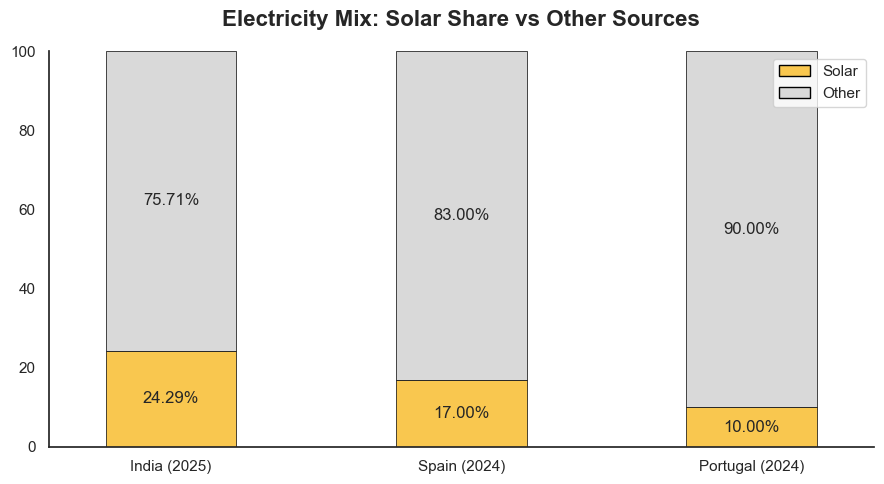

In [7]:
sns.set_theme(style="white")
solar_color = "#f9c74f"
other_color = "#D9D9D9"

x = np.arange(len(df))
years = {"India": 2025, "Spain": 2024, "Portugal": 2024}
labels = [f"{c} ({years[c]})" for c in df["Country"]]
width = 0.45

fig, ax = plt.subplots(figsize=(9,5))

ax.bar(x, df["Solar (%)"], width, color=solar_color, edgecolor="black", linewidth=0.5)
ax.bar(x, df["Other (%)"], width, bottom=df["Solar (%)"],
       color=other_color, edgecolor="black", linewidth=0.5)

ax.set_xticks(x, labels)
ax.set_ylim(0, 100)
ax.set_ylabel("")
ax.set_title("Electricity Mix: Solar Share vs Other Sources",
             fontsize=16, fontweight="bold", pad=18)

ax.margins(x=0.08)

for xi, s in enumerate(df["Solar (%)"]):
    ax.text(xi, s/2, f"{s:.2f}%", ha="center", va="center", fontsize=12)
for xi, s, o in zip(x, df["Solar (%)"], df["Other (%)"]):
    ax.text(xi, s + o/2, f"{o:.2f}%", ha="center", va="center", fontsize=12)

handles = [Patch(facecolor=solar_color, edgecolor="black", label="Solar"),
           Patch(facecolor=other_color, edgecolor="black", label="Other")]
ax.legend(handles=handles, loc="upper right", frameon=True)

sns.despine()
plt.tight_layout()
plt.show()

##Centralized vs Decentralized Solar Grid Connected Deployment by Country

A pie chart protraying the solar adoption deployment is constructed for each country. This is Figure 4.

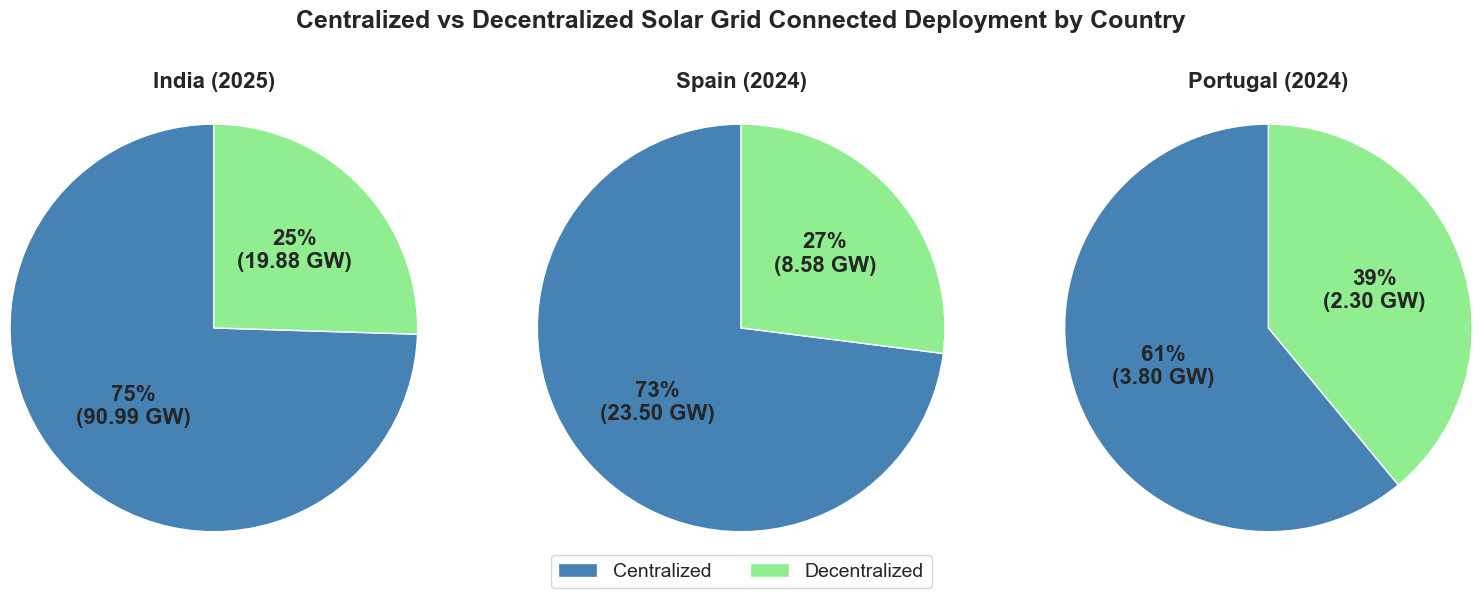

In [8]:
colors = ['steelblue', 'lightgreen']
labels = ['Centralized', 'Decentralized']

def make_autopct_from_sizes(central_pct, util_gw, roof_gw, tol=1e-4):
    def autopct(pct):
        if abs(pct - central_pct) <= tol:
            return f"{pct:.0f}%\n({util_gw:.2f} GW)"
        else:
            return f"{pct:.0f}%\n({roof_gw:.2f} GW)"
    return autopct


pie_radius  = 1.25
pct_font    = 16
title_font  = 16
title_pad   = 26

fig, axes = plt.subplots(1, 3, figsize=(16, 6))
years = {"India": 2025, "Spain": 2024, "Portugal": 2024}

for i, row in solar_benchmark.iterrows():
    sizes = [row["Deployment Centralized %"], row["Deployment Decentralized %"]]
    central_pct = sizes[0] / sum(sizes) * 100.0

    wedges, texts, autotexts = axes[i].pie(
        sizes,
        autopct=make_autopct_from_sizes(
            central_pct,
            row["Utility-scale Projects (GW)"],
            row["Rooftop/Self-consumption (GW)"]
        ),
        startangle=90,
        colors=colors,
        radius=pie_radius,
        pctdistance=0.55,
        textprops={'fontsize': pct_font, 'fontweight': 'bold'}
    )

    for a in autotexts:
        a.set_fontsize(pct_font)
        a.set_weight('bold')
        a.set_linespacing(1.2)

    axes[i].set_title(f"{row['Country']} ({years[row['Country']]})",
                  fontsize=title_font, fontweight="bold", pad=title_pad)
    axes[i].set_aspect('equal', adjustable='box')


handles = [Patch(facecolor=colors[0]), Patch(facecolor=colors[1])]
fig.legend(handles, labels, loc='lower center', ncol=2, fontsize=14)

fig.subplots_adjust(wspace=0.28, top=0.84)
plt.suptitle("Centralized vs Decentralized Solar Grid Connected Deployment by Country",
             fontsize=18, fontweight="bold", y=0.98)
plt.tight_layout(rect=[0, 0.08, 1, 0.90])
plt.show()

##Off-grid Solar Capacity (MW)

To portray the huge difference that exists between India and the Iberian Peninsula countries in terms of Off-grid solar solutions, a horizontal bar chart is constructed. This is Figure 5.

In [9]:
epsilon = 0.1
y_true = solar_benchmark["Off-grid Projects (MW)"]
y_plot = y_true.fillna(epsilon)

years = {"India": 2025, "Spain": 2023, "Portugal": 2025}
df_plot = (
    solar_benchmark
      .assign(_y=y_plot)
      .sort_values("_y", ascending=True)
      .assign(label=lambda d: d["Country"] + " (" + d["Country"].map(years).astype(str) + ")")
)

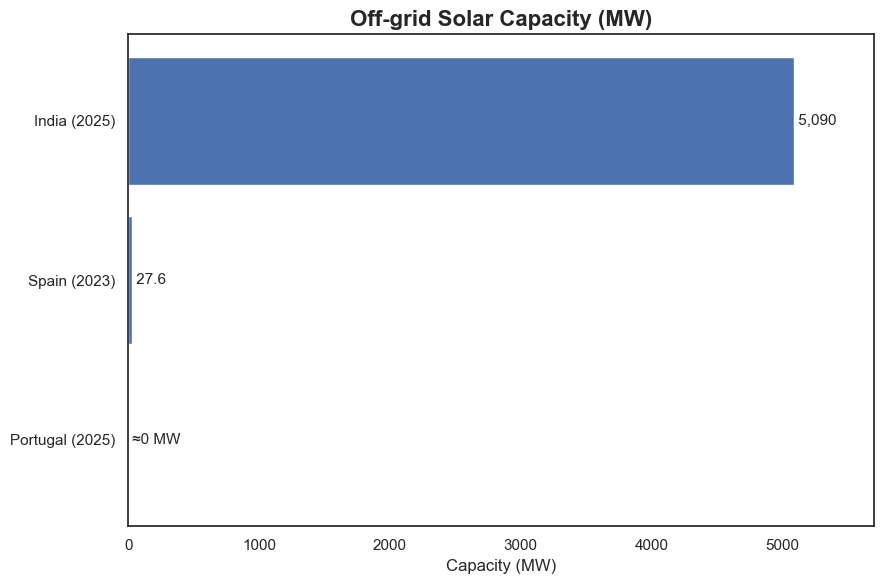

In [10]:
plt.figure(figsize=(9, 6))
bars = plt.barh(df_plot["label"], df_plot["_y"])

plt.title("Off-grid Solar Capacity (MW)", fontsize=16, fontweight="bold")
plt.xlabel("Capacity (MW)")
plt.ylabel("")

for bar, val_true in zip(bars, df_plot["Off-grid Projects (MW)"]):
    if np.isnan(val_true):
        txt = "≈0 MW"
    elif val_true >= 100:
        txt = f"{val_true:,.0f}"
    else:
        txt = f"{val_true:.1f}"
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f" {txt}", va="center", fontsize=11)

max_val = np.nanmax(y_plot)
plt.xlim(0, max_val * 1.12)

plt.tight_layout()
plt.show()

##Total Installed Solar Capacity by Country

A bar chart is made for showing the differences in total installed solar capacity for each country. This is Figure 6.

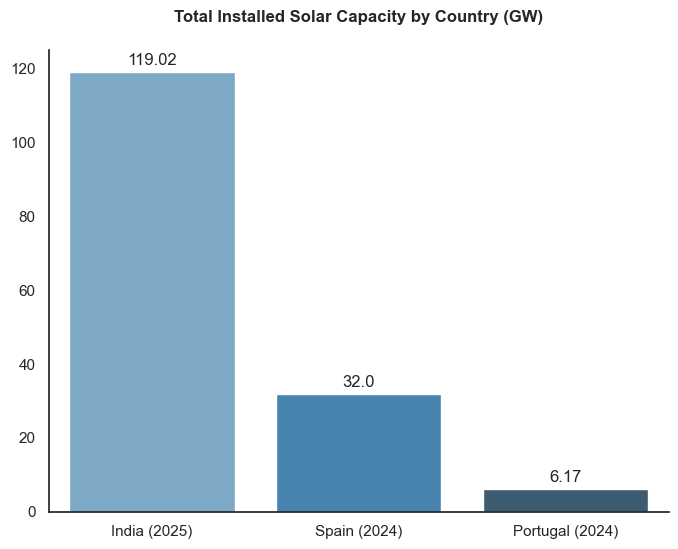

In [11]:
title_pad = 20
plt.figure(figsize=(8,6))
ax = sns.barplot(
    data=solar_benchmark,
    x="Country",
    y="Total Installed Capacity (GW)",
    palette="Blues_d"
)

plt.title("Total Installed Solar Capacity by Country (GW)", fontweight="bold", pad=title_pad)
plt.xlabel('')
plt.ylabel('')
sns.despine(top=True, right=True)

years = {"India": 2025, "Spain": 2024, "Portugal": 2024}
ax.set_xticklabels([f"{t.get_text()} ({years[t.get_text()]})" for t in ax.get_xticklabels()])


for i, row in solar_benchmark.iterrows():
    ax.text(i,
            row["Total Installed Capacity (GW)"] + 1,
            f'{row["Total Installed Capacity (GW)"]}',
            ha='center', va='bottom')

##PV vs CSP Share by Country

A pie chart portraying the usage of each solar technology is constructed for each country. This is Figure 7.

In [12]:
def approx_pct(p):
    if p >= 99.5: 
        return "≈ 100%"
    if p <= 0.5:  
        return "≈ 0%"
    if 0.5 < p < 1.5:
        return "≈ 1%"
    return f"{p:.0f}%"

def fmt_cap_gw(x, zero_tol=0.01):
    try:
        if x is None or x < zero_tol:
            return "≈0 GW"
    except TypeError:
        return "≈0 GW"
    return f"{x:.2f} GW" if x < 10 else f"{x:.0f} GW"

def make_autopct_pv_csp(row, tol=0.6):
    pv_pct  = float(str(row["PV Share %"]).replace('%',''))
    csp_pct = float(str(row["CSP Share %"]).replace('%',''))
    pv_gw   = row["PV Capacity (GW)"]
    csp_gw  = row["CSP Capacity (GW)"]
    def autopct(pct):
        if abs(pct - pv_pct) <= tol:
            return f"{approx_pct(pct)}\n({fmt_cap_gw(pv_gw)})"
        else:
            return f"{approx_pct(pct)}\n({fmt_cap_gw(csp_gw)})"
    return autopct

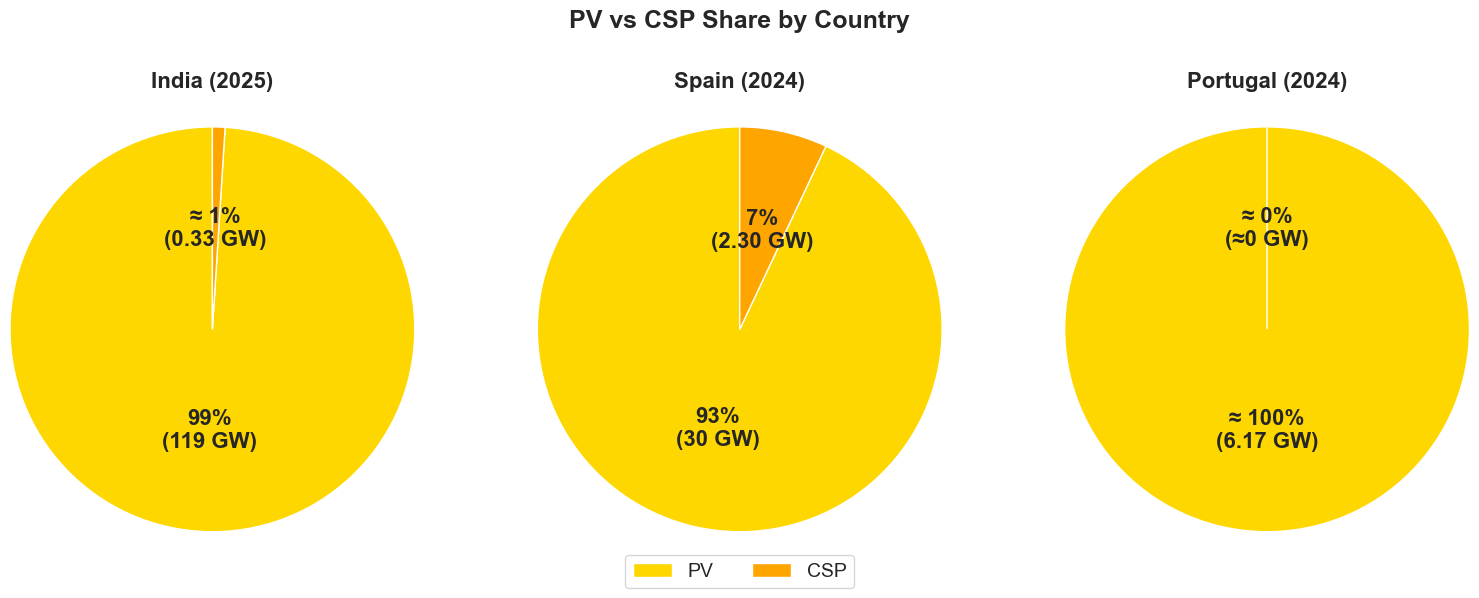

In [13]:
colors = ['gold', 'orange']
legend_labels = ['PV', 'CSP']

pie_radius   = 1.25
pctdistance  = 0.50
title_pad    = 28
pie_label_font = 16

fig, axes = plt.subplots(1, 3, figsize=(16,6))
years = {"India": 2025, "Spain": 2024, "Portugal": 2024}

for i, row in solar_benchmark.iterrows():
    sizes = [
        float(str(row["PV Share %"]).replace('%','')),
        float(str(row["CSP Share %"]).replace('%',''))
    ]
    wedges, texts, autotexts = axes[i].pie(
        sizes,
        labels=None,
        autopct=make_autopct_pv_csp(row),
        startangle=90,
        colors=colors,
        radius=pie_radius,
        pctdistance=pctdistance,
        textprops={'fontsize': pie_label_font, 'fontweight': 'bold'}
    )
    
    for a in autotexts:
        a.set_fontsize(pie_label_font)
        a.set_weight('bold')
        a.set_linespacing(1.2)

    axes[i].set_title(f"{row['Country']} ({years[row['Country']]})",
                  fontsize=title_font, fontweight="bold", pad=title_pad)
    axes[i].set_aspect('equal', adjustable='box')

fig.subplots_adjust(wspace=0.28, top=0.84)
handles = [Patch(facecolor=colors[0]), Patch(facecolor=colors[1])]
fig.legend(handles, legend_labels, loc='lower center', ncol=2, fontsize=14)

plt.suptitle("PV vs CSP Share by Country", fontsize=18, fontweight="bold", y=0.98)
plt.tight_layout(rect=[0,0.08,1,0.90])
plt.show()